# Analyzing NASDAQ Stock Prices - Data Visualization Portfolio Project

This project focuses on analyzing Nasdaq stock data by examining both daily and monthly price movements. Our analysis will address three key questions: What is the average range between the daily high and low prices, and how does it vary by month? Were there periods of increased volatility, and did they coincide with significant market events? Finally, is there a relationship between the daily high-low price range and the daily percentage return? By answering these questions, we aim to uncover patterns in price movements, identify risk factors, and gain insights into market behavior from 2020 to 2022s.

Note that nothing in this project is intended as financial advice.

In this project, we will working on with historical daily and monthly price of stock data for company and we also will be answering this
following questions:


* How does the average daily price range vary across different months?
* How do daily percentage returns accumulate into monthly percentage returns?
* Is there a pattern in the correlation between the daily high-low price range and the daily percentage return?


### Import Libraries

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Load and Inspect Data

The datasets containing the historical stock data for select companies and major indices between 2020 and 2022 are located in the `datasets` folder.
The datasets is:
* `'NASDAQ_daily_prices.csv'`
* `'NASDAQ_monthly_prices.csv'`

Let's load and inspect the historical daily prices for Netflix.

In [8]:
nasdaq_daily_prices = pd.read_csv('NASDAQ_daily_prices.csv')
print(nasdaq_daily_prices.info())
nasdaq_daily_prices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              756 non-null    object 
 1   Open              756 non-null    float64
 2   High              756 non-null    float64
 3   Low               756 non-null    float64
 4   Close             756 non-null    float64
 5   Daily Pct Return  756 non-null    float64
dtypes: float64(5), object(1)
memory usage: 35.6+ KB
None


,Date,Open,High,Low,Close,Daily Pct Return
0,2020-01-02,9039.459961,9093.429688,9010.889648,9092.190430,1.332845
1,2020-01-03,8976.429688,9065.759766,8976.429688,9020.769531,-0.785519
2,2020-01-06,8943.500000,9072.410156,8943.500000,9071.469727,0.562038
3,2020-01-07,9076.639648,9091.929688,9042.549805,9068.580078,-0.031854
4,2020-01-08,9068.030273,9168.889648,9059.379883,9129.240234,0.668905


 Let's load and inspect the historical monthly prices for Netflix.

In [10]:
nasdaq_monthly_prices = pd.read_csv('NASDAQ_monthly_prices.csv')
print(nasdaq_monthly_prices.info())
nasdaq_monthly_prices.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                36 non-null     object 
 1   Open                36 non-null     float64
 2   High                36 non-null     float64
 3   Low                 36 non-null     float64
 4   Close               36 non-null     float64
 5   Monthly Pct Return  36 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.8+ KB
None


,Date,Open,High,Low,Close,Monthly Pct Return
0,2020-01-31,9039.459961,9451.429688,8943.500000,9150.940430,1.987616
1,2020-02-29,9190.719727,9838.370117,8264.160156,8567.370117,-6.377162
2,2020-03-31,8667.139648,9070.320312,6631.419922,7700.100098,-10.122943
3,2020-04-30,7459.500000,8957.269531,7288.109863,8889.549805,15.447198
4,2020-05-31,8681.290039,9523.639648,8537.830078,9489.870117,6.753101


Quick summary and initial observations:
 * We have `Open`, `High`, `Low`, and `Close` (OHLC) price data for the past 36 months from 2020-01 to 2022-12.
 * The `Monthly/Daily Pct Return` column is the percent change from the previous month's closing price to the next month's/day's closing price

## Data Cleaning + Preaparation

Before we can begin to answer our data questions, we'll need to clean and prepare the datasets to more effectively analyze and visualize the stock data.

Since we're working with multiple datasets that seemingly have the same format, let's define a single function that cleans and prepares them by:
 * renaming the column Close to Price, since we'll use closing values as our default price
 * rounding all of the float columns (the OHLC prices and % return columns) to 2 decimal places which is the most common format for stock prices

In [12]:
def clean_stock_data(df):
    df = df.rename({'Close':'Price'}, axis=1)

    for column in df.columns:
        if df[column].dtype == 'float64':
            df[column] = df[column].round(2)

    return df

In [14]:
# Clean daily prices for Nasdaq
nasdaq_daily_cleaned = clean_stock_data(nasdaq_daily_prices)
nasdaq_daily_cleaned.head()


,Date,Open,High,Low,Price,Daily Pct Return
0,2020-01-02,9039.46,9093.43,9010.89,9092.19,1.33
1,2020-01-03,8976.43,9065.76,8976.43,9020.77,-0.79
2,2020-01-06,8943.50,9072.41,8943.50,9071.47,0.56
3,2020-01-07,9076.64,9091.93,9042.55,9068.58,-0.03
4,2020-01-08,9068.03,9168.89,9059.38,9129.24,0.67


In [16]:
# Clean monthly prices for Nasdaq
nasdaq_monthly_cleaned = clean_stock_data(nasdaq_monthly_prices)
nasdaq_monthly_cleaned.head()

,Date,Open,High,Low,Price,Monthly Pct Return
0,2020-01-31,9039.46,9451.43,8943.50,9150.94,1.99
1,2020-02-29,9190.72,9838.37,8264.16,8567.37,-6.38
2,2020-03-31,8667.14,9070.32,6631.42,7700.10,-10.12
3,2020-04-30,7459.50,8957.27,7288.11,8889.55,15.45
4,2020-05-31,8681.29,9523.64,8537.83,9489.87,6.75


We will make sure that Date column is in datetime format

In [18]:
nasdaq_daily_cleaned['Date'] = pd.to_datetime(nasdaq_daily_cleaned['Date'])
nasdaq_monthly_cleaned['Date'] = pd.to_datetime(nasdaq_monthly_cleaned['Date'])

 ### Data Visualizations

 ### 1. How does the average daily price range (High - Low) vary across different months?

 * **Visualization**: A **bar plot** where each month is represented on the x-axis, and the average daily price range (High - Low) within that month is on the y-axis. This could be done using the daily dataset to aggregate monthly averages.
 * **Purpose**: To analyze how intraday volatility changes over time across different months, identifying volatile periods in the stock's performance.

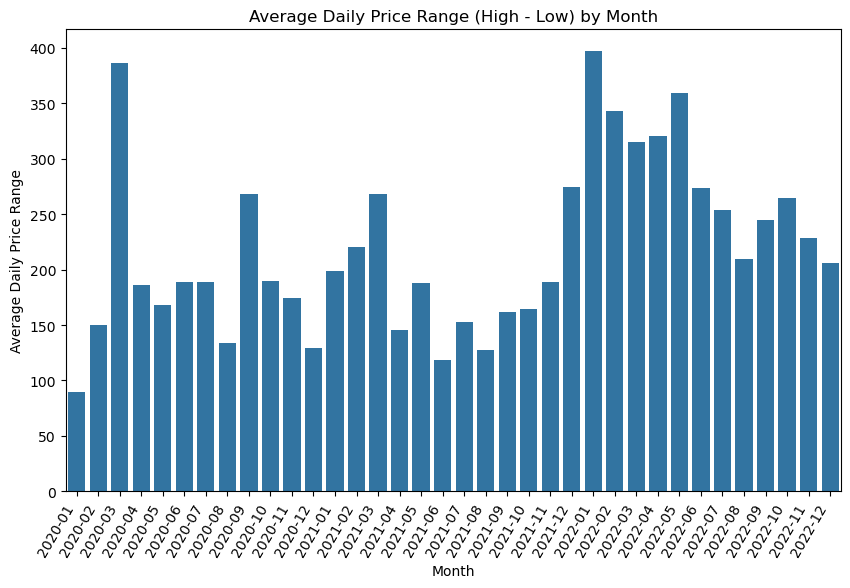

In [65]:
nasdaq_daily_cleaned['Range'] = nasdaq_daily_cleaned['High'] - nasdaq_daily_cleaned['Low']
avg_daily_range_by_month = nasdaq_daily_cleaned.groupby(nasdaq_daily_cleaned['Date'].dt.to_period('M'))['Range'].mean()

plt.figure(figsize=(10, 6))

sns.barplot(x=avg_daily_range_by_month.index.astype(str), y=avg_daily_range_by_month.values)
plt.xticks(rotation=45)
 
plt.title('Average Daily Price Range (High - Low) by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Price Range')
plt.xticks(rotation=60, ha='right')
plt.show()


This bar graph shows the **average daily price range** (the difference between the high and low prices) for each month. The x-axis represents months from early 2020 to the end of 2022, while the y-axis shows the average range in price during each month.

The graph reveals noticeable fluctuations in price volatility across different months. The most significant spikes in volatility occurred in **March 2020** and **March 2022**, where the price range exceeded 350 units. These months likely correspond to major market events or periods of uncertainty. In contrast, there are several months with much lower volatility, particularly in **early 2020** and **mid-2021**, where the price range dropped to around 100 units or lower.

Overall, the graph highlights periods of both high and low volatility, possibly reflecting market reactions to global events or economic changes over time.

 ### 2. How do daily percentage returns accumulate into monthly percentage returns?

 * **Visualization**: A **line plot** that shows how daily returns accumulate to form the overall monthly return. The x-axis would represent time (by day or month), and the y-axis would show cumulative returns.
 * **Purpose**: To visualize how individual daily movements aggregate to form the monthly return, highlighting which days have the greatest impact on the final monthly performance.

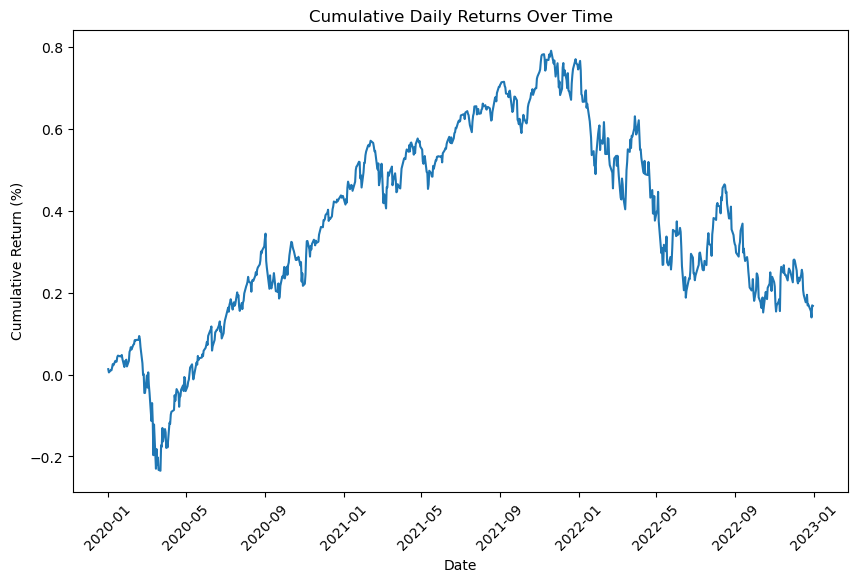

In [56]:
# Calculating cumulative daily percentage return for each month
nasdaq_daily_cleaned['Cumulative Return'] = (1 + nasdaq_daily_cleaned['Daily Pct Return'] / 100).cumprod() - 1

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Cumulative Return', data=nasdaq_daily_cleaned)
plt.title('Cumulative Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.xticks(rotation=45)
plt.show()


This line graph shows the **cumulative daily returns** of a stock over time, from early 2020 to early 2023. The x-axis represents the dates, and the y-axis represents the cumulative return as a percentage (%).

#### Key Observations:
- **Initial drop**: At the beginning of 2020, there was a sharp decline in cumulative returns, likely corresponding to a market downturn or significant event (e.g., the start of the COVID-19 pandemic).
- **Steady rise**: After the drop, the stock's returns began to recover, with a steady increase throughout most of 2020 and into 2021. This indicates strong growth during this period.
- **Peak in late 2021**: Cumulative returns reached their highest point towards the end of 2021, marking a significant gain of around 0.6 to 0.7 in cumulative returns.
- **Decline in 2022**: Starting in early 2022, the cumulative returns began to drop consistently, showing volatility and a clear downward trend, indicating a period of losses or market corrections.
- **Fluctuations in 2022**: While there were some attempts to rebound, the overall trajectory from 2022 through early 2023 continued downward.

This graph helps visualize the overall performance of the stock over time, highlighting periods of growth, stability, and decline.

### 3. Relationship Between Daily High-Low Price Range and Daily Percentage Return 

 * **Visualization**: A **scatter plot** where you compare daily volatility (e.g., the standard deviation of daily returns) with monthly percentage returns. The x-axis can be the monthly returns, and the y-axis can represent daily volatility within each month.
 * **Purpose**: To determine whether periods of higher daily volatility lead to higher or lower monthly returns, helping to understand risk-reward dynamics.

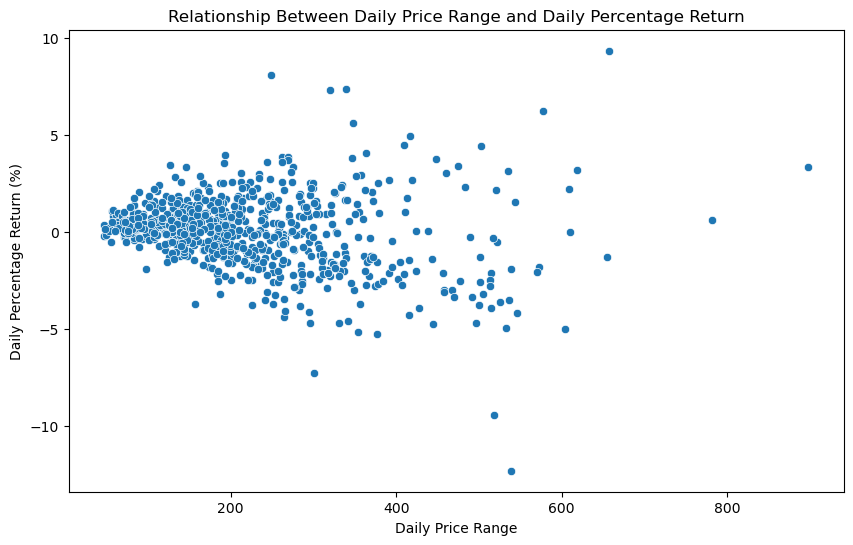

In [40]:
 # Calculate daily price range (High - Low)
nasdaq_daily_cleaned['Daily Price Range'] = nasdaq_daily_cleaned['High'] - nasdaq_daily_cleaned['Low']

# Plot the relationship between Daily Price Range and Daily Percentage Return
plt.figure(figsize=(10, 6))
sns.scatterplot( data=nasdaq_daily_cleaned, x='Daily Price Range', y='Daily Pct Return')
plt.title('Relationship Between Daily Price Range and Daily Percentage Return')
plt.xlabel('Daily Price Range')
plt.ylabel('Daily Percentage Return (%)')
plt.show()


The scatter plot above illustrates the relationship between the **daily price range** (the difference between the high and low prices for each day) and the **daily percentage return** (the percentage change in price for that day). Each dot represents a single day from the dataset.

From the graph, we observe that most of the daily price ranges fall between 100 and 300 units, with daily percentage returns ranging mostly between -5% and 5%. There is a noticeable concentration of points within this range, suggesting that for most days, the price movements and percentage returns stay within a relatively narrow band.

A few days exhibit outliers, with very high price ranges (up to 800 units) and percentage returns that are significantly positive or negative. However, the overall relationship between price range and return appears somewhat dispersed, indicating no clear or strong correlation between larger price swings and the magnitude of daily returns in this visual representation.

### Conlusion

### Conclusion:

1. **Average Daily Price Range Across Different Months:**
   The average daily price range shows significant variation from month to month. In certain periods, such as early 2020 and parts of 2022, the price range spiked significantly, indicating higher volatility during these times. Other months, particularly in mid-2021, saw a much smaller average price range, reflecting relatively stable market conditions. This variability could be tied to macroeconomic events or market-specific catalysts affecting the NASDAQ during these periods.

2. **Daily Percentage Returns Accumulating into Monthly Percentage Returns:**
   Daily percentage returns, when accumulated into monthly percentage returns, reveal how small day-to-day movements can combine into larger overall trends. The relationship between daily and monthly returns illustrates that a few volatile days within a month can have a significant impact on the overall monthly performance. This highlights how market volatility on individual days contributes to the broader monthly trends, emphasizing the importance of monitoring both short-term and long-term price movements.

3. **Correlation Between Daily High-Low Price Range and Daily Percentage Return:**
   There appears to be a weak but noticeable relationship between the daily high-low price range and the daily percentage return. Generally, days with larger price ranges tend to show higher volatility in returns, as the wider price movement allows for greater shifts in percentage change. However, this relationship is not perfectly linear, as there are many days with large price ranges but relatively moderate percentage returns, suggesting other factors like market sentiment or external events influencing the returns.

### Overall, the analysis suggests that:
- Market volatility varies significantly month to month.
- Daily returns, though small individually, can accumulate into significant monthly performance.
- There is a loose correlation between the price range and percentage return, with wider price ranges often (but not always) corresponding to more volatile returns. Understanding these relationships helps in better forecasting market movements and assessing risk over different time horizons.